In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
wine_data = pd.read_csv("wine-quality-data.csv")
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
x = wine_data.drop(["quality"], axis =1)
y = wine_data["quality"]

In [4]:
model = RandomForestClassifier(random_state =42)

In [5]:
hyper_params = {'criterion':['gini', 'entropy','log_loss'],
                'max_depth':[5, 25, 50,100,200,300, None],
                'n_estimators':[50,100,200, 500]}

In [6]:
grid = GridSearchCV(estimator = model, param_grid = hyper_params, scoring="accuracy", cv =10)

In [7]:
grid.fit(x, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 25, 50, 100, 200, 300, None],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [8]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}
0.5922680817610062
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, random_state = 42)

In [10]:
model = RandomForestClassifier(criterion="gini", max_depth=5, n_estimators = 200,  random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [11]:
predictions = model.predict(x_test)

In [12]:
accuracy_score(y_test, predictions)

0.56875

Text(0.5, 1.0, 'Title: Model Feature Importance')

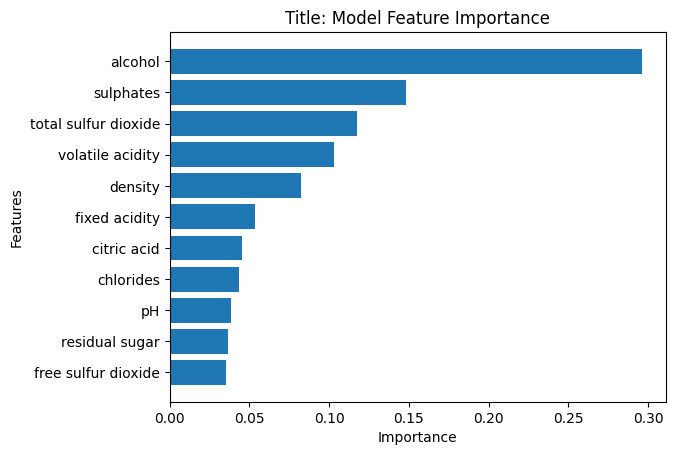

In [14]:
feature_importances = model.feature_importances_
feature_names = wine_data.columns

sorted_importance = feature_importances.argsort()


plt.barh(range(len(feature_importances)), feature_importances[sorted_importance])
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_importance])
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Title: Model Feature Importance")